<a href="https://colab.research.google.com/github/sololzano/2021-Python-Optimization-Lab/blob/main/W4_NumPy_PyPlot_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy and PyPlot

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import time

In [2]:
# Six Hump Camel Function
def six_hump_camel(x1, x2):
    a = (4 - 2.1*x1**2 + (1/3)*x1**4)*x1**2
    b = x1*x2
    c = (-4 + 4*x2**2)*x2**2
    return a + b +c

In [3]:
# Adjiman's Benchmark Function
def adjiman(x1, x2):
  a = np.cos(x1) * np.sin(x2)
  b = x1 / (x2**2 + 1)
  return (a - b)

In [4]:
def init_population(objective_function, dimensions, pop_size, x_min, x_max, v_max):
  # Particles
  x = np.random.uniform(x_min, x_max, (pop_size, dimensions))
  
  # Velocity
  v = np.random.uniform(-v_max/3, v_max/3, (pop_size, dimensions))
  
  # Particle's best
  pb = np.copy(x)

  # Objective function
  f = objective_function(x[:, 0], x[:, 1])
  
  # Best index
  gb_idx = np.argmin(f)
  
  # Global best
  gb = np.copy(x[gb_idx])

  return x, v, pb, f, gb, gb_idx

In [5]:
def init_population_for(objective_function, dimensions, pop_size, x_min, x_max, v_max):

  # Define Particles, Velocities and Particles' best
  x = np.zeros((pop_size, dimensions))
  v = np.zeros((pop_size, dimensions))
  pb = np.zeros((pop_size, dimensions))

  # Assign random numbers to Particles and Velocities
  for i in range(pop_size):
    for j in range(dimensions):
      x[i][j] = np.random.uniform(x_min, x_max)
      v[i][j] = np.random.uniform(-v_max/3, v_max/3)
    # Copy Particles to Particles' best
    pb[i] = x[i]
  
  # Define global best as first particle and calculate objective
  gb = pb[0]
  fgb = objective_function(gb[0], gb[1])
  gb_idx = 0

  # Iterate through population
  for i in range(pop_size):
    # Calculate particle's i best objective function 
    fpb = objective_function(pb[i][0], pb[i][1])
    if fpb < fgb:
      gb = pb[i]
      fgb = fpb
      gb_idx = i
  return x, v, pb, gb, gb_idx

In [6]:
# Generate initial population with for loop
x, v, pb, gb, gb_idx = init_population_for(six_hump_camel, 2, 5, -3, 3, 3)
gb

array([1.94906136, 0.80518117])

In [16]:
# Calculate time with magic commands, for loop
%timeit _ = init_population_for(six_hump_camel, 2, 10000, -3, 3, 3)

10 loops, best of 5: 200 ms per loop


In [17]:
%timeit _ = init_population(six_hump_camel, 2, 10000, -3, 3, 3)

1000 loops, best of 5: 1.42 ms per loop


In [ ]:
# Visualize particles and velocity vectors
def plot_particles(particles, velocity):
  return 0

In [ ]:
# PSO
def pso(objective_function, dimensions, pop_size, x_min, x_max, v_max, c1, c2, max_iter):
  # Loop here
  return 0

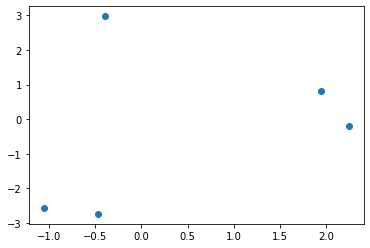

In [19]:
plt.scatter(x[:, 0], x[:, 1])